# Stochastic Programming

Here is the [handout for lecture](../../handouts/Farmers.pdf)

This notebook was prepared by [Jialu Wang](https://github.com/jialuw96) at the University of Notre Dame.

Stochastic programming optimizes when some parameters are uncertain, but defined with a probability distribution. It is opposed to deterministic programming where all parameters are known.

$\Xi$: random variable, results of an 'experiment'

$\xi$: a realization, i.e., outcome of a simple experiment

Each realization has an associated probability $p(\xi)$. $\Theta$ is the set of all possible realizations, $\xi \in \Theta$. 

Let $x$ be stage 1 decision varialbes, $y$ be stage 2 decision variables, a deterministic optimization problem is formed as: 

$\min f(x,y,w)$

$\ \ \ \ \ \  g(x,y,w) \leq 0$

$\ \ \ \ \ \  u(x,y,w) = 0$

When the parameters $w$ are uncertain, the corresponding stochastic optimization problem is formed as: 

$\min E[f(x,y,\Xi)]$

$\ \ \ \ \ \  g(x,y,\Xi) \leq 0$

$\ \ \ \ \ \  u(x,y,\Xi) = 0$

In [ ]:
# Imports
import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.easy_install()
else:
    sys.path.insert(0, '../')
    import helper
helper.set_plotting_style()

## Key Concepts

### Infinite Dimensional Formulation

Continuous random variables have the key property: 

$0 \leq p(\xi) \leq 1$ for all $\xi \in \Theta$

$\int p(\xi) d\xi = 1$

The expectation is formed as:

$E_{\Xi} = \int_{\Xi} f(\xi) P_{\Xi}(\xi) d\xi$

### Discrete (Finite Dimensional) Approximations

Discrete random variables have the key property: 

$0 \leq p(\xi) \leq 1$ for all $\xi \in \Theta$

$\sum p(\xi) = 1$

The expectation of it: 

$E_{\Xi} = \sum_{\Xi} f(\xi) w(\xi)$

### Sample Average Approximation

Sample average approximation (SAA) method is an approach for solving stochastic optimization problems by Monte Carlo simulation. It approximates the expected objective function of the stochastic problem by a sample average estimate derived from a random sample. The resulting sample average approximation problem is then solved by deterministic optimization techniques. 

Consider a stochastic program in the following form: 

$z = \inf \int_{\Xi} g(x,\xi) P(d\xi)$

The optimal solution $x^*$ will have optimal value $z^*$. SAA consider a sample ${\xi^i}$ of independent observations of $\xi$:

$z^{\nu} = \inf \frac{1}{\nu} \sum_{i=1}^{\nu} g(x,\xi^i)$

Where $x^{\nu}$ is the random vector of solutions with independent random samples, $\xi^i$, $i=1,...,\nu$. 

### Sparse Grids (Worst Case)

Instead of Monte carlo sampling, sparse grids can be used to obtain efficient characterizations of the integrals in stochastic programs. Many computational problems are solved on full grids. While this is feasible if the dimentionality $d$ of the problem is low, 2 or 3, full grids become very expensive when facing a higher dimentional problem $d>4$. This is due to the curse of dimensionality, which states that the complexity of full grids grows exponentially with $d$. 

Sparse grids defeat the curse of dimentionality and allow the solution of the problems with much smaller effort. It is constructed by extending one-dimensional quadrature rules to higher dimensions. Gaussian quadrature rule is one of these rules to approximate the definite integral of a function. It is usually a weighted sum of function values at specified points within the domain of integration, stated as: 

$\int f(x)dx \approx \sum_{i=1}^{n} \omega_i f(x_i) $

Comparison between 2-point Gaussian and trapezoidal quadrature. For the polynomial: 

$y(x) = 7x^3-8x^2-3x+3$

whose integral in [-1,1] is $\frac{2}{3}$. 

The trapezoidal rule returns the integral of the orange dashed line: 

$y(-1)+y(1) = -10$

The 2-point Gaussian quadrature returns the integral of the black dashed curve, equal to:

$y(-\sqrt{\frac{1}{3}}) + y(\sqrt{\frac{1}{3}}) = \frac{2}{3}$


![sg1](https://raw.githubusercontent.com/ndcbe/optimization/main/media/sg-2.png)

Figure from [1]

In [3]:
import Tasmanian
import numpy as np
import matplotlib.pyplot as plt

# define bounds for integration
UB = 1
LB = -1

# function
y = lambda x: 7*x**3-8*x**2-3*x+3

# integrated function 
int_y = lambda x: 1.75*x**4-8/3*x**3-1.5*x**2+3*x

# real area 
real_S = int_y(UB) - int_y(LB)
print('The area:', real_S)

# area calculated by trapezoidal rule
trap_S = (y(UB)+y(LB))*(UB-LB)/2
print('The area calculated by trapezoidal rule:', trap_S)

# generate sparse grids
range_p = np.array([[LB,UB]])
grid_p = Tasmanian.SparseGrid()
grid_p.makeGlobalGrid(1,0,1,'level','gauss-legendre')
grid_p.setDomainTransform(range_p)
points_p = grid_p.getPoints()
weights_p = grid_p.getQuadratureWeights()
# area calculated by sparse grids
gauss_S = sum(y(point)*weights_p[i] for i, point in enumerate(points_p))
print('The area calculated by Gauss rule:', gauss_S)

The area: 0.6666666666666674
The area calculated by trapezoidal rule: -10.0
The area calculated by Gauss rule: [0.66666667]


How to choose quadrature rules for sparse grids depends on how the problem is formed. A guidance on how to choose the one dimensional quadrature rule can be found in:
https://tasmanian.ornl.gov/documentation/group__SGEnumerates.html#ga145e27d5ae92acdd5f74149c6d4f2ca2

The following example shows several example quadrature rules:

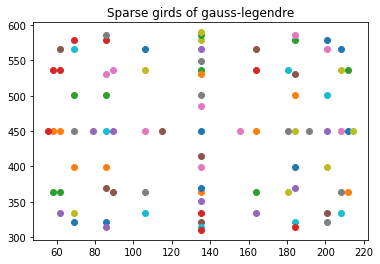

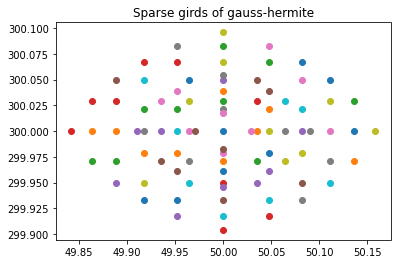

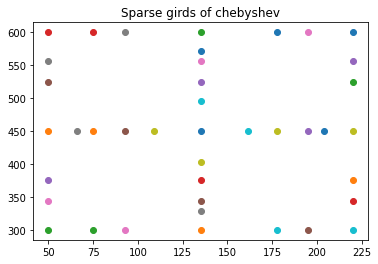

In [4]:
def show_sparse_grids(range_p,dim=2,output=0,depth=5, rule='gauss-legendre'):
    '''
    This function shows the sparse grids generated with different rules
    Arguments:
        range_p: dimension ranges 
        dim: sparse grids dimension
        output: output level
        depth: depth level
        rule: quadrature rules
    Return: 
        None
    Other:
        A figure shows 2D sparse grids
    '''
    grid_p = Tasmanian.SparseGrid()
    grid_p.makeGlobalGrid(dim,output,depth,'level',rule)
    grid_p.setDomainTransform(range_p)
    points_p = grid_p.getPoints()
    weights_p = grid_p.getQuadratureWeights()
    
    for i in range(len(points_p)):
        plt.scatter(points_p[i,0], points_p[i,1])
        plt.title('Sparse girds of '+rule)
    plt.show()
    
range_fix = np.array([[50,220],[300,600]])
show_sparse_grids(range_fix)
show_sparse_grids(range_fix, rule='gauss-hermite')
show_sparse_grids(range_fix, rule='chebyshev')

The following figure shows sparse grid on the top, and Monte Carlo samples on the bottom. Left graphs contain 441 scenarios, and the right graphs contain 1073 scenarios. Sparse grids can efficiently cover the domain and lead to higher convergence rates. 

![sg1](https://raw.githubusercontent.com/ndcbe/optimization/main/media/sg-1.png)

Figure from [2]

## Farmers Example

![ex1](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer1.png)
![ex1.1](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer2.png)
![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer3.png)

In [5]:
from pyomo.environ import *

### Solve the perfect information optimization problem

def build_model(yields):
    '''
    Code adapted from https://mpi-sppy.readthedocs.io/en/latest/examples.html#examples
    
    Arguments:
        yields: Yield information as a list, following the rank [wheat, corn, beets]
        
    Return: 
        model: farmer problem model 
    '''
    model = ConcreteModel()
    
    # Define sets
    all_crops = ["WHEAT", "CORN", "BEETS"]
    purchase_crops = ["WHEAT", "CORN"]
    sell_crops = ["WHEAT", "CORN", "BEETS_FAVORABLE", "BEETS_UNFAVORABLE"]
    
    # Crops field allocation
    model.X = Var(all_crops, within=NonNegativeReals)
    # How many tons of crops to purchase
    model.Y = Var(purchase_crops, within=NonNegativeReals)
    # How many tons of crops to sell
    model.W = Var(sell_crops,within=NonNegativeReals)

    # Objective function
    model.PLANTING_COST = 150 * model.X["WHEAT"] + 230 * model.X["CORN"] + 260 * model.X["BEETS"]
    model.PURCHASE_COST = 238 * model.Y["WHEAT"] + 210 * model.Y["CORN"]
    model.SALES_REVENUE = (
        170 * model.W["WHEAT"] + 150 * model.W["CORN"]
        + 36 * model.W["BEETS_FAVORABLE"] + 10 * model.W["BEETS_UNFAVORABLE"]
    )
    # Maximize the Obj is to minimize the negative of the Obj
    model.OBJ = Objective(
        expr=model.PLANTING_COST + model.PURCHASE_COST - model.SALES_REVENUE,
        sense=minimize
    )

    # Constraints
    model.CONSTR= ConstraintList()

    model.CONSTR.add(summation(model.X) <= 500)
    model.CONSTR.add(
        yields[0] * model.X["WHEAT"] + model.Y["WHEAT"] - model.W["WHEAT"] >= 200
    )
    model.CONSTR.add(
        yields[1] * model.X["CORN"] + model.Y["CORN"] - model.W["CORN"] >= 240
    )
    model.CONSTR.add(
        yields[2] * model.X["BEETS"] - model.W["BEETS_FAVORABLE"] - model.W["BEETS_UNFAVORABLE"] >= 0
    )
    model.W["BEETS_FAVORABLE"].setub(6000)

    return model

### Perfect information 

With the 'perfect' information shown in the table above, the optimization problem is formed as: 

![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer2-0.png)

In [6]:
# Perfect yields 
yields_perfect = [2.5, 3, 20]
model = build_model(yields_perfect)
solver = SolverFactory("ipopt")
solver.solve(model)

# The Obj is a negative number for minimizing 
profit_perfect = -value(model.OBJ)

print("===Optimal solutions based on perfect information===")

print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Surface (acres)  | ', f'{value(model.X["WHEAT"]):.1f}', '|', 
      f'{value(model.X["CORN"]):.1f}', ' |',
       f'{value(model.X["BEETS"]):.1f}',' |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_perfect[0]:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_perfect[1]:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_perfect[2]:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT"]):.1f}', '|', 
      f'{value(model.W["CORN"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE"]) + value(model.W["BEETS_UNFAVORABLE"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT"]):.1f}', '  |', 
      f'{value(model.Y["CORN"]):.1f}', '  |',
       '-','     |')
print('Overall profit: $',f"{profit_perfect:.1f}")

===Optimal solutions based on perfect information===
Culture.         |  Wheat | Corn  | Sugar Beets |
Surface (acres)  |  120.0 | 80.0  | 300.0  |
Yield (T)        |  300.0 | 240.0 | 6000.0 |
Sales (T)        |  100.0 | 0.0   | 6000.0 |
Purchases (T)    |  0.0   | 0.0   | -      |
Overall profit: $ 118600.0


The optimal solution based on perfect information is: 

![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer2-1.png)

This solution is easy to understand:
- The farmer devotes enough land to sugar beets to reach the quota of 6000 T
- Devote enough land to wheat and corn production to meet the feeding requirement
- Plant wheat in the rest of the land

However, there are often some 'real world' constraints that break the perfect information heuristic: 
- Market prices change 
- Yield is uncertain
- Planting cost materials, water, labor...
- Crop rotation 

A representation of the uncertainty would be to assume that years are good, fair, or bad for all crops, resulting in above average, average, or below average yields for all crops. Three scenarios are defined as:
- Above average yield (+20%)
- Average yield (base case)
- Below average yield (-20%)



In [7]:
### Run Above average case
yields_above = [2.5*1.2, 3*1.2, 20*1.2]
model = build_model(yields_above)
solver = SolverFactory("ipopt")
solver.solve(model)

profit_above = -value(model.OBJ)


print("===Optimal solutions based on above average yields (-20%)===")
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Surface (acres)  | ', f'{value(model.X["WHEAT"]):.1f}', '|', 
      f'{value(model.X["CORN"]):.1f}', ' |',
       f'{value(model.X["BEETS"]):.1f}',' |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_above[0]:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_above[1]:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_above[2]:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT"]):.1f}', '|', 
      f'{value(model.W["CORN"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE"]) + value(model.W["BEETS_UNFAVORABLE"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT"]):.1f}', '  |', 
      f'{value(model.Y["CORN"]):.1f}', '  |',
       '-','     |')
print('Overall profit: $',f"{profit_above:.1f}")

===Optimal solutions based on above average yields (-20%)===
Culture.         |  Wheat | Corn  | Sugar Beets |
Surface (acres)  |  183.3 | 66.7  | 250.0  |
Yield (T)        |  550.0 | 240.0 | 6000.0 |
Sales (T)        |  350.0 | 0.0   | 6000.0 |
Purchases (T)    |  0.0   | 0.0   | -      |
Overall profit: $ 167666.7


In [8]:
### Run Below average case
yields_below = [2.5*0.8, 3*0.8, 20*0.8]
model = build_model(yields_below)
solver = SolverFactory("ipopt")
solver.solve(model)

profit_below = -value(model.OBJ)


print("===Optimal solutions based on below average yields (-20%)===")
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Surface (acres)  | ', f'{value(model.X["WHEAT"]):.1f}', '|', 
      f'{value(model.X["CORN"]):.1f}', ' |',
       f'{value(model.X["BEETS"]):.1f}',' |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_below[0]:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_below[1]:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_below[2]:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT"]):.1f}', '|', 
      f'{value(model.W["CORN"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE"]) + value(model.W["BEETS_UNFAVORABLE"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT"]):.1f}', '  |', 
      f'{value(model.Y["CORN"]):.1f}', '  |',
       '-','     |')
print('Overall profit: $',f"{profit_below:.1f}")

===Optimal solutions based on below average yields (-20%)===
Culture.         |  Wheat | Corn  | Sugar Beets |
Surface (acres)  |  100.0 | 25.0  | 375.0  |
Yield (T)        |  200.0 | 60.0 | 6000.0 |
Sales (T)        |  0.0 | 0.0   | 6000.0 |
Purchases (T)    |  0.0   | 180.0   | -      |
Overall profit: $ 59950.0


Running the optimization problem based on above average and below average yields gives optimal solutions: 

![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer2-2.png)


The solutions again seem natural. When yields are high, smaller surfaces are needed to raise the minimum requirements in wheat and corn and the sugar beet quota. The remaining land is devoted to wheat, whose extra production is sold. When yields are low, larger surfaces are needed to raise the minimum requirements and the sugar beet quota. 

Unfortunately, weather conditions cannot be accurately predicted six months ahead. The farmer must make up his mind without perfect information on yields! 

### Include uncertainty in the two-stage stochastic program

Now the farmer wants to assess the benefits and losses of each decision in each situation. 

Decisions on land assignment ($x_1$, $x_2$, $x_3$) have to be taken now, but sales and purchases ($w_i, i=1,...,4$, $y_j, j=1,2$) depend on the yields. This forms the two-stage stochastic program: 

1. Stage 1 decisions: land assignments ($x_1$, $x_2$, $x_3$)
2. Uncertainty is realized 
3. Stage 2 decisions: wait-and-see (sales and purchases)

It is useful to index those decisions by a scenario index $s=1,2,3$ according to above average, average or below average yields, respectively. This creates a new set of variables $w_{is}, i=1,2,3,4, s=1,2,3$ and $y_{js}, j=1,2, s=1,2,3.$ For e.g., $w_{32}$ represents the amount of sugar beets sold at the favorable price if yields are average. 

It the three scenarios have an equal probability of 1/3, the farmer's problem is formed as: 

![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer3-1.png)



In [9]:
def build_sp_model(yields):
    '''
    Code adapted from https://mpi-sppy.readthedocs.io/en/latest/examples.html#examples
    It specifies the extensive form of the two-stage stochastic programming
    
    Arguments:
        yields: Yield information as a list, following the rank [wheat, corn, beets]
        
    Return: 
        model: farmer problem model 
    '''
    model = ConcreteModel()
    
    all_crops = ["WHEAT", "CORN", "BEETS"]
    purchase_crops = ["WHEAT", "CORN"]
    sell_crops = ["WHEAT", "CORN", "BEETS_FAVORABLE", "BEETS_UNFAVORABLE"]
    scenarios = ["ABOVE","AVERAGE","BELOW"]
    
    # Fields allocation
    model.X = Var(all_crops, within=NonNegativeReals)
    # How many tons of crops to purchase in each scenario
    model.Y = Var(purchase_crops, scenarios, within=NonNegativeReals)
    # How many tons of crops to sell in each scenario
    model.W = Var(sell_crops, scenarios, within=NonNegativeReals)

    # Objective function
    model.PLANTING_COST = 150 * model.X["WHEAT"] + 230 * model.X["CORN"] + 260 * model.X["BEETS"]
    model.PURCHASE_COST_ABOVE = 238 * model.Y["WHEAT", "ABOVE"] + 210 * model.Y["CORN","ABOVE"]
    model.SALES_REVENUE_ABOVE = (
        170 * model.W["WHEAT", "ABOVE"] + 150 * model.W["CORN","ABOVE"]
        + 36 * model.W["BEETS_FAVORABLE","ABOVE"] + 10 * model.W["BEETS_UNFAVORABLE","ABOVE"])
    
    model.PURCHASE_COST_AVE = 238 * model.Y["WHEAT", "AVERAGE"] + 210 * model.Y["CORN","AVERAGE"]
    model.SALES_REVENUE_AVE = (
        170 * model.W["WHEAT", "AVERAGE"] + 150 * model.W["CORN","AVERAGE"]
        + 36 * model.W["BEETS_FAVORABLE","AVERAGE"] + 10 * model.W["BEETS_UNFAVORABLE","AVERAGE"])
    
    model.PURCHASE_COST_BELOW = 238 * model.Y["WHEAT", "BELOW"] + 210 * model.Y["CORN","BELOW"]
    model.SALES_REVENUE_BELOW = (
        170 * model.W["WHEAT", "BELOW"] + 150 * model.W["CORN","BELOW"]
        + 36 * model.W["BEETS_FAVORABLE","BELOW"] + 10 * model.W["BEETS_UNFAVORABLE","BELOW"])
    
    model.OBJ = Objective(
        expr=model.PLANTING_COST + 1/3*(model.PURCHASE_COST_ABOVE + model.PURCHASE_COST_AVE + model.PURCHASE_COST_BELOW)
        - 1/3*(model.SALES_REVENUE_ABOVE + model.SALES_REVENUE_AVE + model.SALES_REVENUE_BELOW),
        sense=minimize
    )

    # Constraints
    model.CONSTR= ConstraintList()

    model.CONSTR.add(summation(model.X) <= 500)
    model.CONSTR.add(yields[0] * model.X["WHEAT"] + model.Y["WHEAT","AVERAGE"] - model.W["WHEAT","AVERAGE"] >= 200)
    model.CONSTR.add(yields[0]*1.2 * model.X["WHEAT"] + model.Y["WHEAT","ABOVE"] - model.W["WHEAT","ABOVE"] >= 200)
    model.CONSTR.add(yields[0]*0.8 * model.X["WHEAT"] + model.Y["WHEAT","BELOW"] - model.W["WHEAT","BELOW"] >= 200)
    
    model.CONSTR.add(yields[1] * model.X["CORN"] + model.Y["CORN","AVERAGE"] - model.W["CORN","AVERAGE"] >= 240)
    model.CONSTR.add(yields[1]*1.2 * model.X["CORN"] + model.Y["CORN","ABOVE"] - model.W["CORN","ABOVE"] >= 240)
    model.CONSTR.add(yields[1]*0.8 * model.X["CORN"] + model.Y["CORN","BELOW"] - model.W["CORN","BELOW"] >= 240)
    
    model.CONSTR.add(
        yields[2] * model.X["BEETS"] - model.W["BEETS_FAVORABLE","AVERAGE"] - model.W["BEETS_UNFAVORABLE","AVERAGE"] >= 0
    )
    model.CONSTR.add(
        yields[2]*1.2 * model.X["BEETS"] - model.W["BEETS_FAVORABLE","ABOVE"] - model.W["BEETS_UNFAVORABLE","ABOVE"] >= 0
    )
    model.CONSTR.add(
        yields[2]*0.8 * model.X["BEETS"] - model.W["BEETS_FAVORABLE","BELOW"] - model.W["BEETS_UNFAVORABLE","BELOW"] >= 0
    )
    
    
    model.W["BEETS_FAVORABLE","AVERAGE"].setub(6000)
    model.W["BEETS_FAVORABLE","ABOVE"].setub(6000)
    model.W["BEETS_FAVORABLE","BELOW"].setub(6000)

    return model

In [10]:
### calculate two-stage stochastic problem
yields_perfect = [2.5, 3, 20]
model = build_sp_model(yields_perfect)
solver = SolverFactory("ipopt")
solver.solve(model)

profit_2stage = -value(model.OBJ)

print("===Optimal solutions of two-stage stochastic problem===")
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Surface (acres)  | ', f'{value(model.X["WHEAT"]):.1f}', '|', 
      f'{value(model.X["CORN"]):.1f}', ' |',
       f'{value(model.X["BEETS"]):.1f}',' |')
print('First stage: s=1 (Above average)')
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_perfect[0]*1.2:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_perfect[1]*1.2:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_perfect[2]*1.2:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT","ABOVE"]):.1f}', '|', 
      f'{value(model.W["CORN","ABOVE"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE","ABOVE"]) + value(model.W["BEETS_UNFAVORABLE","ABOVE"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT","ABOVE"]):.1f}', '  |', 
      f'{value(model.Y["CORN","ABOVE"]):.1f}', '  |',
       '-','     |')

print('First stage: s=2 (Average average)')
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_perfect[0]:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_perfect[1]:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_perfect[2]:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT","AVERAGE"]):.1f}', '|', 
      f'{value(model.W["CORN","AVERAGE"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE","AVERAGE"]) + value(model.W["BEETS_UNFAVORABLE","AVERAGE"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT","AVERAGE"]):.1f}', '  |', 
      f'{value(model.Y["CORN","AVERAGE"]):.1f}', '  |',
       '-','     |')

print('First stage: s=3 (Below average)')
print('Culture.         | ', 'Wheat |', 'Corn  |', 'Sugar Beets |')
print('Yield (T)        | ', f'{value(model.X["WHEAT"])*yields_perfect[0]*0.8:.1f}', '|', 
      f'{value(model.X["CORN"])*yields_perfect[1]*0.8:.1f}', '|',
       f'{value(model.X["BEETS"])*yields_perfect[2]*0.8:.1f}','|')
print('Sales (T)        | ', f'{value(model.W["WHEAT","BELOW"]):.1f}', '|', 
      f'{value(model.W["CORN","BELOW"]):.1f}', '  |',
       f'{value(model.W["BEETS_FAVORABLE","BELOW"]) + value(model.W["BEETS_UNFAVORABLE","BELOW"]):.1f}','|')
print('Purchases (T)    | ', f'{value(model.Y["WHEAT","BELOW"]):.1f}', '  |', 
      f'{value(model.Y["CORN","BELOW"]):.1f}', '  |',
       '-','     |')
print('Overall profit: $',f"{profit_2stage:.1f}")

===Optimal solutions of two-stage stochastic problem===
Culture.         |  Wheat | Corn  | Sugar Beets |
Surface (acres)  |  170.0 | 80.0  | 250.0  |
First stage: s=1 (Above average)
Culture.         |  Wheat | Corn  | Sugar Beets |
Yield (T)        |  510.0 | 288.0 | 6000.0 |
Sales (T)        |  310.0 | 48.0   | 6000.0 |
Purchases (T)    |  0.0   | 0.0   | -      |
First stage: s=2 (Average average)
Culture.         |  Wheat | Corn  | Sugar Beets |
Yield (T)        |  425.0 | 240.0 | 5000.0 |
Sales (T)        |  225.0 | 0.0   | 5000.0 |
Purchases (T)    |  0.0   | 0.0   | -      |
First stage: s=3 (Below average)
Culture.         |  Wheat | Corn  | Sugar Beets |
Yield (T)        |  340.0 | 192.0 | 4000.0 |
Sales (T)        |  140.0 | 0.0   | 4000.0 |
Purchases (T)    |  0.0   | 48.0   | -      |
Overall profit: $ 108390.0


![ex1.2](https://raw.githubusercontent.com/ndcbe/optimization/main/media/farmer2-4.png)

Such a model of a stochastic decision program is known as the $extensive$ $form$ of the stochastic program because it explicitly describes the second-stage decision variables for all scenarios. 

This solution illustrates that it is impossible to find a solution that is ideal under all circumstances under uncertainty.

### EVPI and VSS

Suppose yields vary over years but are cyclical. A year with above average yields is always followed by a year with average yields and then a year with below average yields. The farmer would take optimal solutions as given in perfect information chapter repectively. The mean profit in the long run will be the mean of the three figures, namely \$115,406 per year.

Now assume again the yields vary over years but on a random basis. The farmer does not get prior information on the yields. So, the best he can do in the long run is to take the solution as given in the two-stage stochastic program. The difference between this figure and the value in the case of perfect information is $the$ $expected$ $value$ $of$ $perfect$ $information$ (EVPI). It represents the loss of profit due to the presence of uncertainty. 


Another approach is to assume expected yields and always to allocate the optimal planting surface according to these yields, which represents the $expected$ $value$ $solution$. The loss by not considering the random variation is the difference between this and the stochastic model profit, which is called the $value$ $of$ $the$ $stochastic$ $solution$ (VSS).




In [13]:
# calculated EVPI
EVPI = (profit_perfect+profit_above+profit_below)/3 - profit_2stage 

# calculate expectation value
expected = build_sp_model(yields_perfect)
# fix variables with solutions
expected.X["WHEAT"].fix(120)
expected.X["CORN"].fix(80)
expected.X["BEETS"].fix(300)
# solve the model
solver = SolverFactory("ipopt")
solver.solve(expected)
# calculate expected value
profit_expect = -value(expected.OBJ)
print('Expectation:', profit_expect)

VSS = (profit_2stage - profit_expect)

print('EVPI:', EVPI)
print('VSS:', VSS)

Expectation: 107240.00084222008
EVPI: 7015.554283317964
VSS: 1150.0010277524998


$EVPI$ measures the value of knowing the future with certainty, while $VSS$ assesses the value of knowing and using distributions on future outcomes. 

### Reference 

Biegler, L.T., 2010. Nonlinear programming: concepts, algorithms, and applications to chemical processes. Society for Industrial and Applied Mathematics.

Birge, J.R. and Louveaux, F., 2011. Introduction to stochastic programming. Springer Science & Business Media.

Code partly adapted from: 

https://mpi-sppy.readthedocs.io/en/latest/quick_start.html

https://mpi-sppy.readthedocs.io/en/latest/examples.html#examples

Figures from:

[1] By Paolostar - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=46820806

[2] Renteria, J.A., Cao, Y., Dowling, A.W. and Zavala, V.M., 2018. Optimal pid controller tuning using stochastic programming techniques. AIChE Journal, 64(8), pp.2997-3010.